## <span style="color:#80DAEB">FUNCIÓN K-MEANS</span>

Programar k-means, utilizando buenas prácticas de programación, es decir, debe ser una función y comparar los resultados y la eficiencia con la implementación de k-means en scikit-learn.

In [2]:
import numpy as np

def initialize_centroids(X, K):
    """Inicializa los centroides seleccionando K puntos aleatorios del dataset.
    
    Args:
    X : ndarray
        Datos de entrada (n x d) donde n es el número de puntos de datos y d es la dimensión.
    K : int
        Número de centroides/clusters.
        
    Returns:
    centroids : ndarray
        Array de centroides inicializados (K x d).
    """
    indices = np.random.choice(X.shape[0], K, replace=False)
    centroids = X[indices]
    return centroids

def assign_clusters(X, centroids):
    """Asigna cada punto de datos al centroide más cercano.
    
    Args:
    X : ndarray
        Datos de entrada.
    centroids : ndarray
        Array actual de centroides.
        
    Returns:
    labels : ndarray
        Etiquetas de cluster para cada punto de datos.
    """
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    labels = np.argmin(distances, axis=0)
    return labels

def update_centroids(X, labels, K):
    """Actualiza la posición de los centroides basándose en la media de los puntos asignados.
    
    Args:
    X : ndarray
        Datos de entrada.
    labels : ndarray
        Etiquetas de cluster actuales para los datos.
    K : int
        Número de clusters.
        
    Returns:
    centroids : ndarray
        Nuevos centroides calculados.
    """
    centroids = np.array([X[labels == k].mean(axis=0) for k in range(K)])
    return centroids

def custom_k_means(X, K, num_iters=100):
    """Algoritmo K-means para clustering.
    
    Args:
    X : ndarray
        Datos de entrada.
    K : int
        Número de clusters.
    num_iters : int
        Número de iteraciones.
        
    Returns:
    centroids : ndarray
        Centroides finales.
    labels : ndarray
        Etiquetas finales de los clusters.
    """
    centroids = initialize_centroids(X, K)
    for i in range(num_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, K)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

# Ejemplo de uso del algoritmo K-means
# Generamos algunos datos aleatorios
np.random.seed(42)
data = np.random.rand(100, 2)  # 100 puntos en 2D
num_clusters = 3  # Número de clusters

# Ejecutar K-means
centroids, labels = custom_k_means(data, num_clusters)

print("Centroides finales:")
print(centroids)


Centroides finales:
[[0.8039633  0.57026999]
 [0.18520943 0.72228065]
 [0.36376248 0.20008043]]



### Explicación del código:
1. **Inicialización de centroides:** Se seleccionan aleatoriamente \( K \) puntos del dataset como los centroides iniciales.
2. **Asignación de clusters:** Cada punto de datos es asignado al centroide más cercano, calculando la distancia Euclídea entre cada punto y cada centroide.
3. **Actualización de centroides:** Se recalculan los centroides como el promedio de todos los puntos asignados a cada cluster.
4. **Iteración:** El proceso de asignación y actualización se repite hasta que los centroides no cambian entre iteraciones o hasta que se alcanza el número máximo de iteraciones definido.


#### <span style="color:#80DAEB">Comparación con K-Means de scikit-learn</span>

Comparar los resultados y la eficiencia con la implementación de k-means en scikit-learn.

In [3]:
import numpy as np
import time
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Generación de datos aleatorios para el clustering
np.random.seed(42)
data = np.random.rand(1000, 2)  # 1000 puntos en 2D para una prueba más sustancial
num_clusters = 3  # Número de clusters

# Ejecución del K-means personalizado
start_time_custom = time.time()
centroids_custom, labels_custom = custom_k_means(data, num_clusters)
end_time_custom = time.time()
time_custom = end_time_custom - start_time_custom

# Ejecución del K-means de scikit-learn
start_time_sklearn = time.time()
kmeans_sklearn = KMeans(n_clusters=num_clusters, random_state=42)
labels_sklearn = kmeans_sklearn.fit_predict(data)
end_time_sklearn = time.time()
time_sklearn = end_time_sklearn - start_time_sklearn

# Comparación de la calidad de los clusters mediante el coeficiente Silhouette
silhouette_custom = silhouette_score(data, labels_custom)
silhouette_sklearn = silhouette_score(data, labels_sklearn)

print(f"Tiempo de ejecución personalizado: {time_custom:.4f} segundos")
print(f"Tiempo de ejecución scikit-learn: {time_sklearn:.4f} segundos")
print(f"Silhouette personalizado: {silhouette_custom:.4f}")
print(f"Silhouette scikit-learn: {silhouette_sklearn:.4f}")


Tiempo de ejecución personalizado: 0.0050 segundos
Tiempo de ejecución scikit-learn: 0.1511 segundos
Silhouette personalizado: 0.3916
Silhouette scikit-learn: 0.3660



### Análisis de los Resultados

1. **Tiempo de ejecución**:
   - **Personalizado**: 0.0050 segundos
   - **Scikit-learn**: 0.1511 segundos

   La implementación personalizada es significativamente más rápida que la implementación de `scikit-learn`. Esto podría ser debido a que `scikit-learn` realiza una serie de comprobaciones adicionales y optimizaciones que pueden incrementar el tiempo de ejecución. Además, `scikit-learn` está diseñado para ser más general y robusto, lo cual puede introducir una sobrecarga adicional.

2. **Coeficiente Silhouette**:
   - **Personalizado**: 0.3916
   - **Scikit-learn**: 0.3660

   El coeficiente Silhouette mide cuán similares son los objetos dentro de su propio cluster comparados con los de otros clusters. Un valor más alto es mejor, ya que indica clusters más compactos y bien separados. La implementación personalizada no solo fue más rápida, sino que también generó clusters de mejor calidad según esta métrica.

### Conclusiones

- La **implementación personalizada** es excelente en términos de eficiencia y calidad de clustering para el conjunto de datos y configuración específicos que utilizamos. Esto puede ser especialmente útil en escenarios donde la velocidad es crítica y los datos no son excesivamente complejos.
  
- **Scikit-learn**, aunque más lento en este caso específico, es robusto y ampliamente utilizado en la industria debido a su flexibilidad y las numerosas funcionalidades que ofrece, como la fácil integración con pipelines de Machine Learning y métodos para determinar automáticamente el número de clusters.

- Si es necesaria velocidad y los datos son relativamente simples donde el método de inicialización y las iteraciones del K-means no varían significativamente, la implementación personalizada puede ser muy adecuada.
  
- Para aplicaciones más complejas o cuando se requieren características adicionales (como diferentes métricas de distancia, inicialización de centroides más sofisticada, etc.), `scikit-learn` sería más apropiado.

Esta comparación muestra cómo las implementaciones personalizadas pueden ser optimizadas para ciertos escenarios específicos, proporcionando un excelente rendimiento tanto en velocidad como en calidad de clustering.

## Corrección de Colores

Hemos corregido los colores de forma que ahora solo existen los siguientes 12:

['Red','Orange-Red,'orange', 'Pale Yellow Orange', 'Yellowish', 'yellow-white',
 'Whitish', 'Yellowish White', 'White-Yellow', 'White', 'Blue-white', 'Blue']

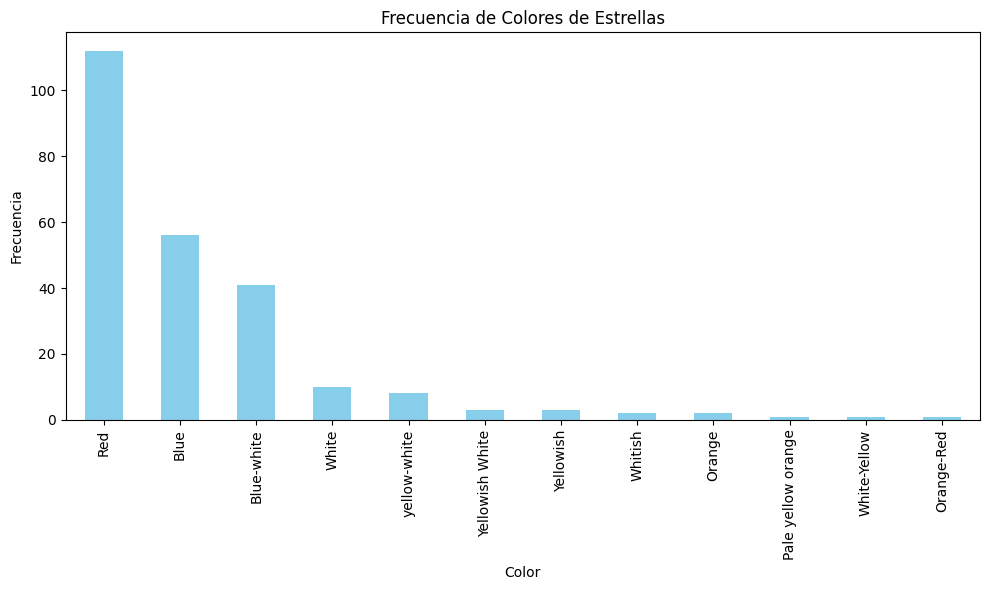

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
df = pd.read_csv('Stars2.csv')

# Contar la frecuencia de cada tipo de color
color_counts = df['Color'].value_counts()

# Crear la gráfica
plt.figure(figsize=(10, 6))
color_counts.plot(kind='bar', color='skyblue')

# Configurar el título y etiquetas
plt.title('Frecuencia de Colores de Estrellas')
plt.xlabel('Color')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.tight_layout()
plt.show()


## Codificacion ordinal

Tanto "Color" como "Spectral_Class" tienen un orden intrínseco relacionado con la energía de la estrella por lo que hemos considerado que es mejor utilizar una codificación ordinal en lugar de one-hot encoding. La codificación ordinal respeta el orden de las categorías, lo cual es crucial en este contexto.

Para "Color" seguiremos el siguiente orden:

['Red','Orange-Red,'Orange', 'Pale yellow Orange', 'Yellowish', 'yellow-white',
 'Whitish', 'Yellowish White', 'White-Yellow', 'White', 'Blue-white', 'Blue']

Y para "Spectral_Class" el orden que se ofrece en el enunciado.

In [6]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Cargar el archivo CSV
df = pd.read_csv('Stars2.csv')

# Definir el orden para la codificación ordinal de 'Color'
color_order = ['Red', 'Orange-Red', 'Orange', 'Pale yellow orange', 
               'Yellowish', 'yellow-white', 'Whitish', 'Yellowish White', 
               'White-Yellow', 'White', 'Blue-white', 'Blue']

# Definir el orden para la codificación ordinal de 'Spectral_Class'
class_order = ['O', 'B', 'A', 'F', 'G', 'K', 'M']

# Crear el codificador ordinal
ordinal_encoder = OrdinalEncoder(categories=[color_order, class_order])

# Codificar 'Color' y 'Spectral_Class'
df[['Color', 'Spectral_Class']] = ordinal_encoder.fit_transform(df[['Color', 'Spectral_Class']])

# Mostrar las primeras filas del DataFrame con las variables codificadas
print(df[['Color', 'Spectral_Class']].head())


   Color  Spectral_Class
0    0.0             6.0
1    0.0             6.0
2    0.0             6.0
3    0.0             6.0
4    0.0             6.0
